# 2501980690_Agnes Calista
---



---


##Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline
from sklearn import preprocessing
from scipy.stats import mode
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('insurance.csv')
df


,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


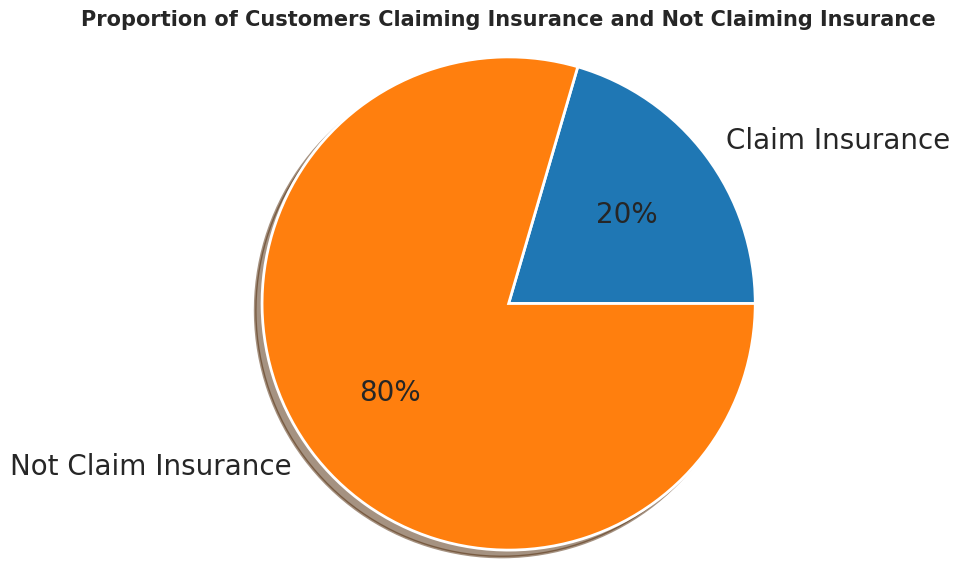

In [ ]:
labels = 'Claim Insurance', "Not Claim Insurance"
sizes = [df.smoker[df['smoker'] == 1].count(), df.smoker[df['smoker'] == 0].count()]

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, labels=labels, autopct='%.0f%%', shadow=True, textprops={'fontsize': 20})
ax1.axis('equal')
plt.title("Proportion of Customers Claiming Insurance and Not Claiming Insurance",
        fontsize = 15,
        family = 'sans-serif',
        fontweight='bold')
plt.show()

In [ ]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [ ]:
df.tail()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,4008,3,0,1,10600.5483,0
1334,18,0,31.92,3003,0,0,0,2205.9808,1
1335,18,0,36.85,3008,0,0,2,1629.8335,1
1336,21,0,25.80,8009,0,0,3,2007.9450,0
1337,61,0,29.07,8008,0,1,1,29141.3603,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


Pada data tabel diatas menunjukkan bahwa dataset Insurance tidak memiliki nilai null dan jenis data 7 berupa integer, 2 berupa float

#Explore the Dataset

In [ ]:
df.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


#Relationships

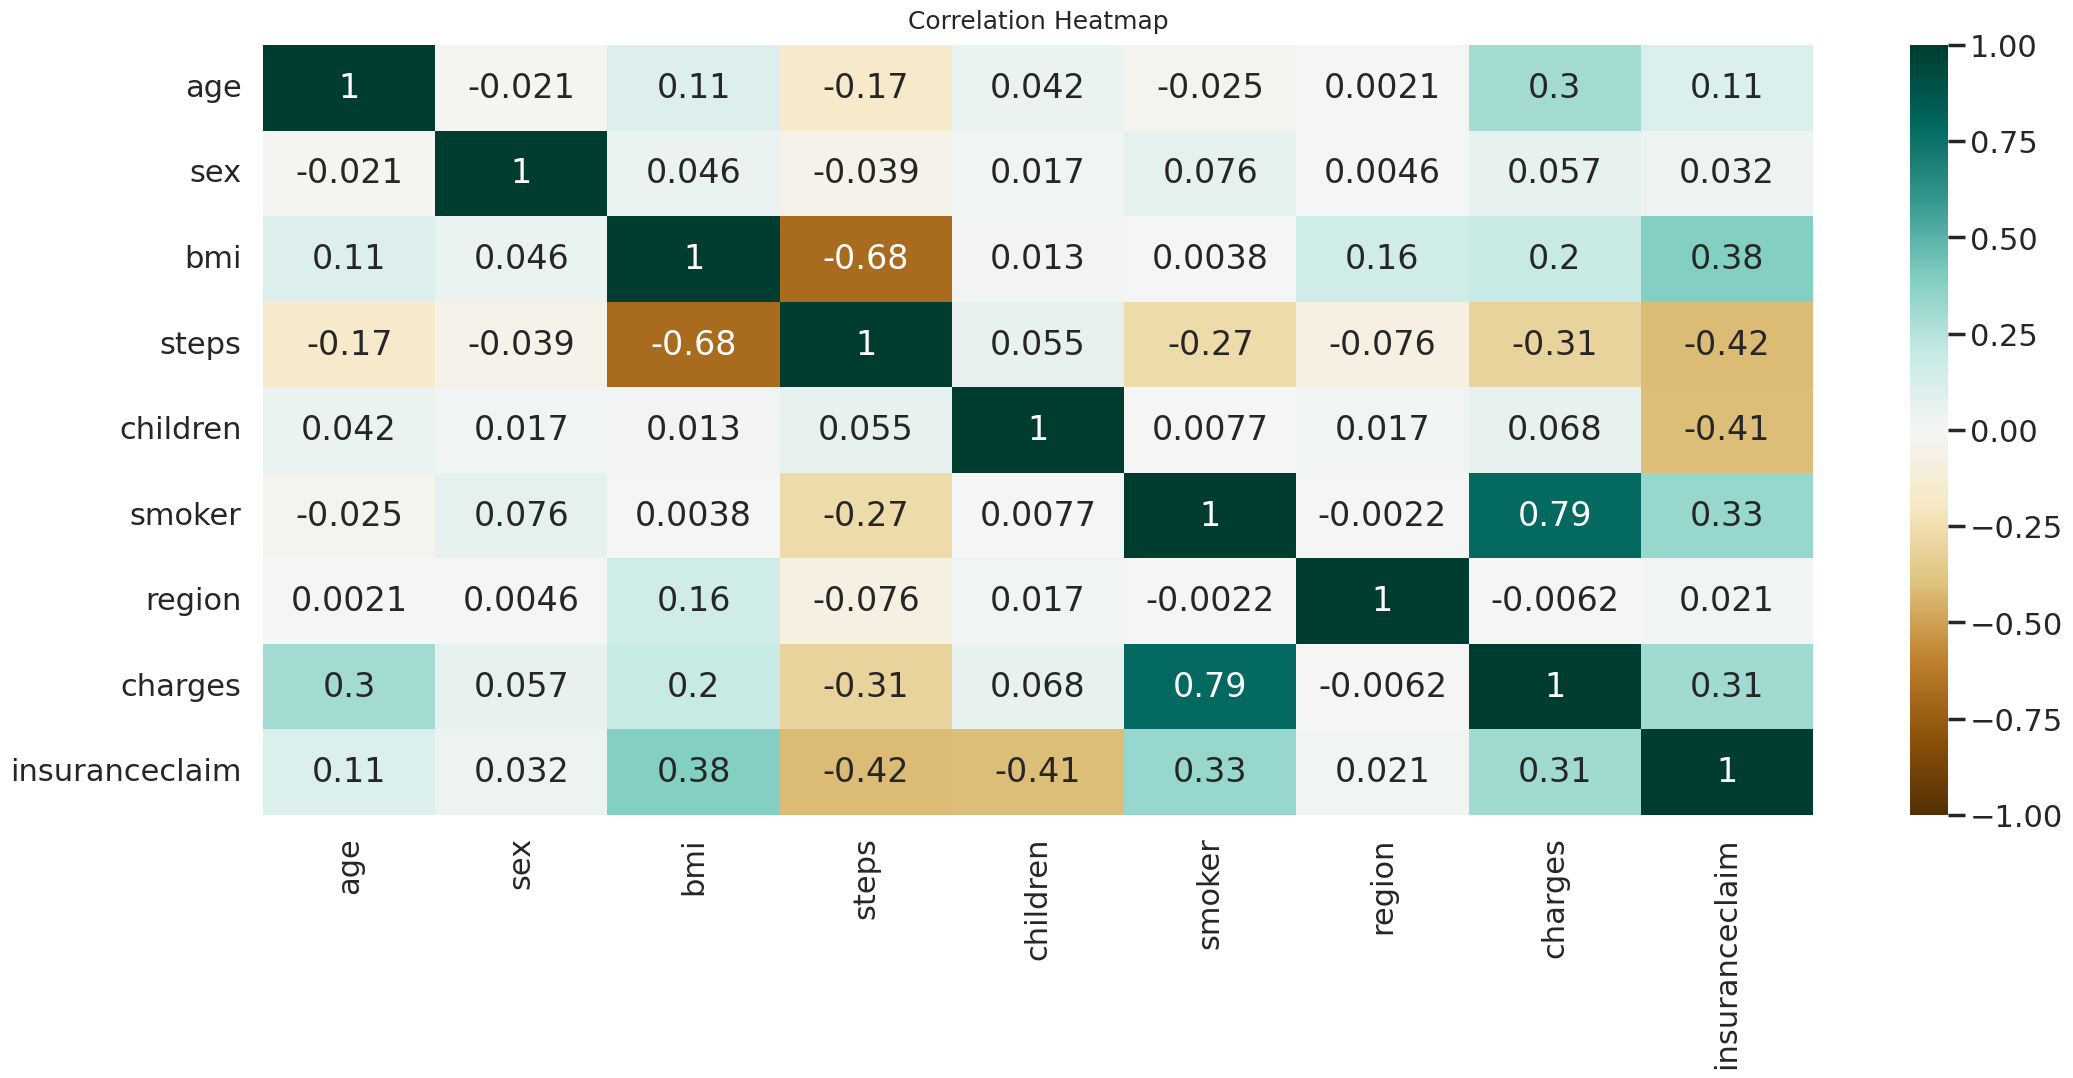

In [ ]:
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax=1, annot= True, cmap ='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad=12);

Pada Data tersebut dapat dilihat bahwa variabel smoker dan charges memiliki korelasi yang paling tinggi dan variabel terendah ada pada variabel steps dan bmi.


### Dimension Data

In [ ]:
df.shape

(1338, 9)

terdapat 1338 baris dan 9 column

### Check Missing Value

In [ ]:
df.isna()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False,False


Tidak terdapat Missing Value pada dataset tersebut.

In [ ]:
df.isna().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

Tidak terdapat Missing Value pada dataset tersebut.

###Check Duplicate

In [ ]:
df.duplicated().sum()

0

Tidak terdapat data yang terduplikat pada dataset tersebut.

### Check Unique Value

In [ ]:
df.nunique()

age                 47
sex                  2
bmi                548
steps               55
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64

Terdapat unik value contohnya sex hanya ada 2 nilai yaitu laki-laki atau perempuan


## Handling Outliers

age                  Axes(0.125,0.712609;0.168478x0.167391)
sex               Axes(0.327174,0.712609;0.168478x0.167391)
bmi               Axes(0.529348,0.712609;0.168478x0.167391)
steps             Axes(0.731522,0.712609;0.168478x0.167391)
children             Axes(0.125,0.511739;0.168478x0.167391)
smoker            Axes(0.327174,0.511739;0.168478x0.167391)
region            Axes(0.529348,0.511739;0.168478x0.167391)
charges           Axes(0.731522,0.511739;0.168478x0.167391)
insuranceclaim        Axes(0.125,0.31087;0.168478x0.167391)
dtype: object

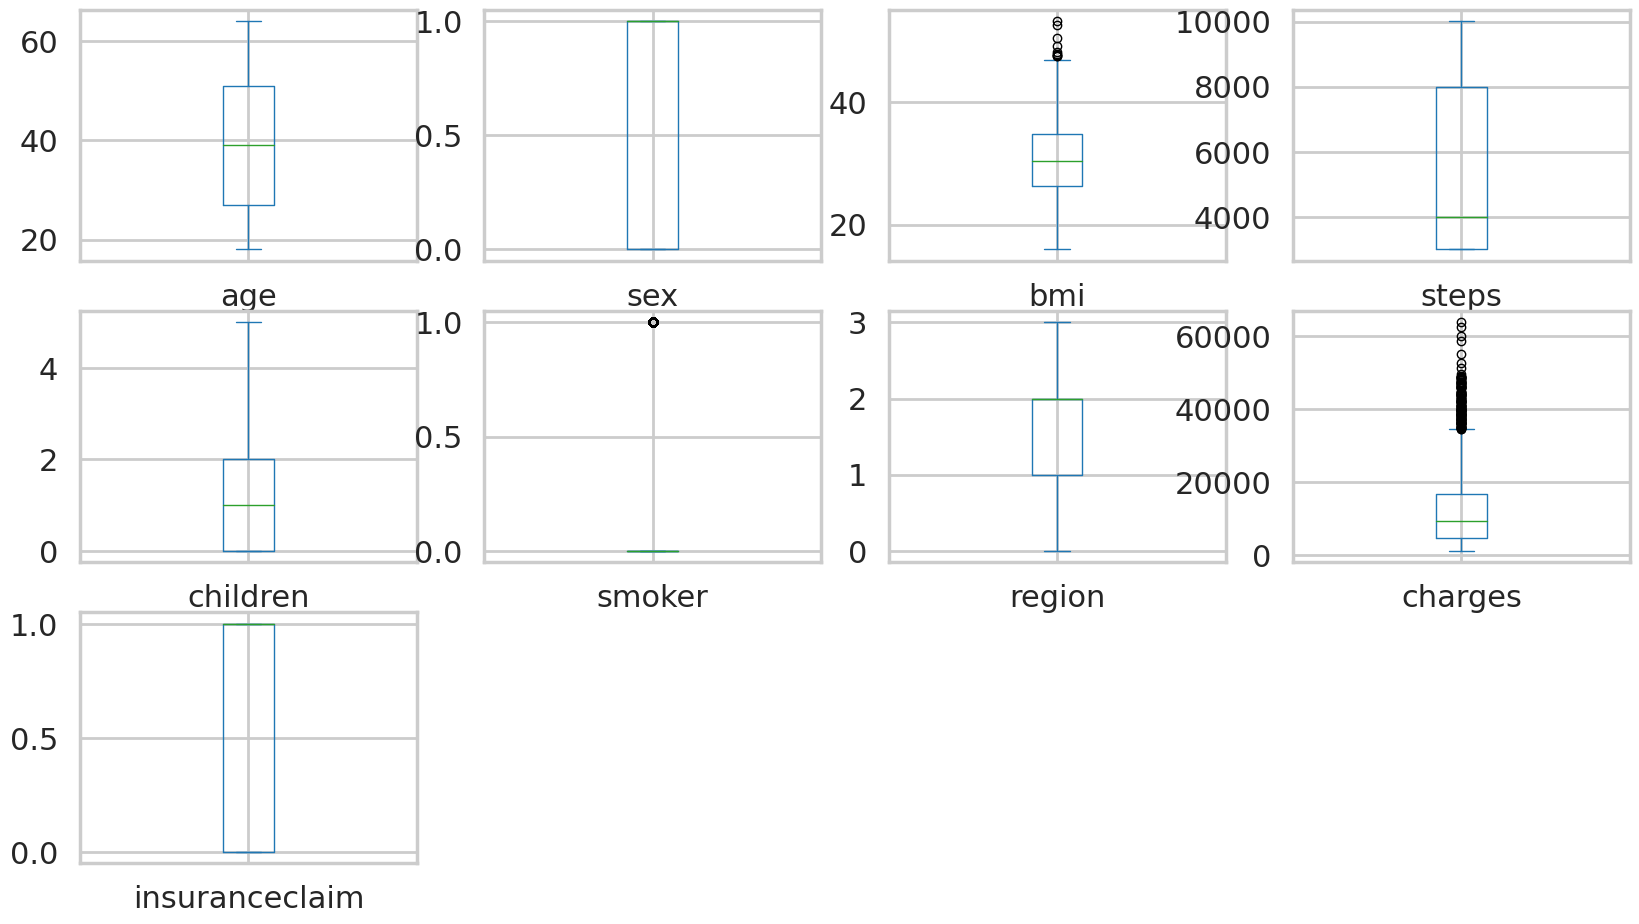

In [ ]:
df.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(
20,15))


Dapat dilihat pada gambar outliers tersebut.
1. Variabel bmi memiliki outlier
2. Variabel charges memiliki outlier
3. Variabel smoker hanya memiliki 1 outlier

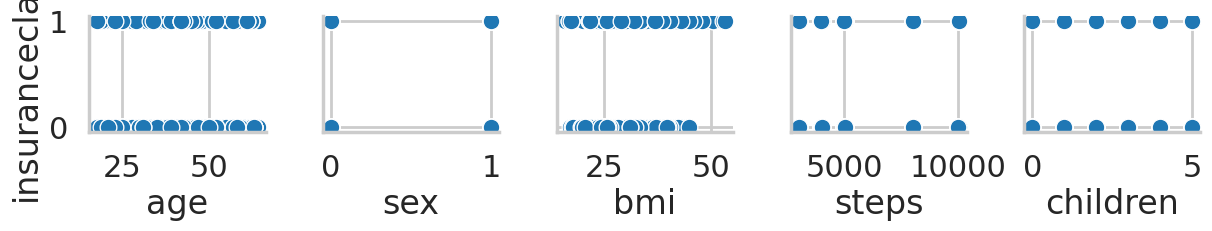

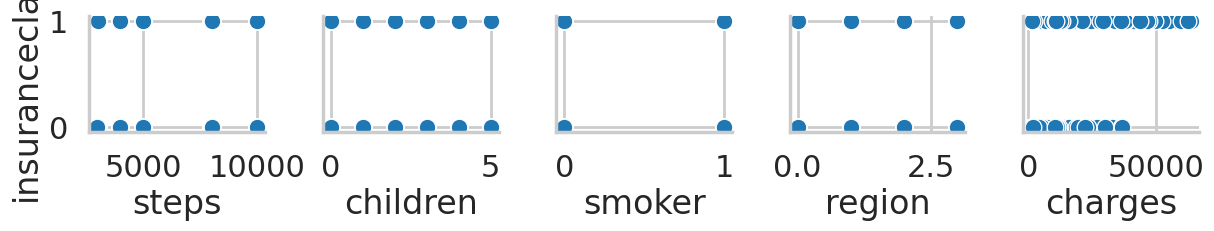

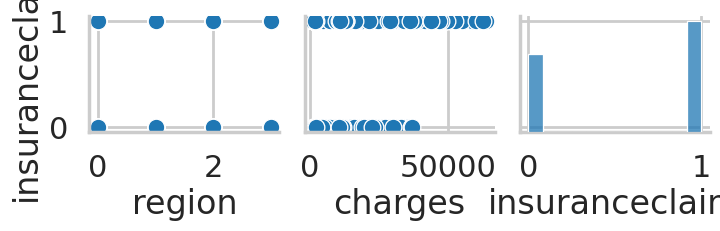

In [ ]:
for i in range(0, len(df.columns), 3):
  sns.pairplot(data=df, x_vars = df.columns[i:i+5], y_vars = ['insuranceclaim'])

In [ ]:
#calculating IQOR scores for each column
q1 = df.quantile(0.20)
q3 = df.quantile(0.80)
iqr = q3-q1

#filtering outliers using the calculated IQR scores
df = df[~((df < (q1-1.5*iqr))| (df>(q3+1.5*iqr))).any(axis = 1)]

Pada coding diatas jika variabel yang mengandung outlier akan difilter. Jika outlier tersebut diatas q3 dan dibawah q1 outlier akan terhapus

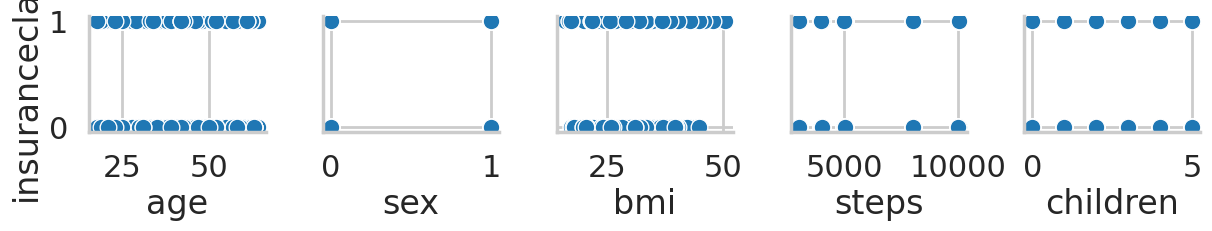

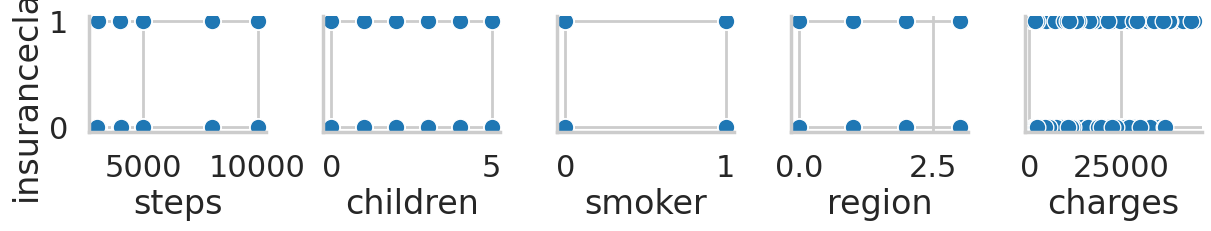

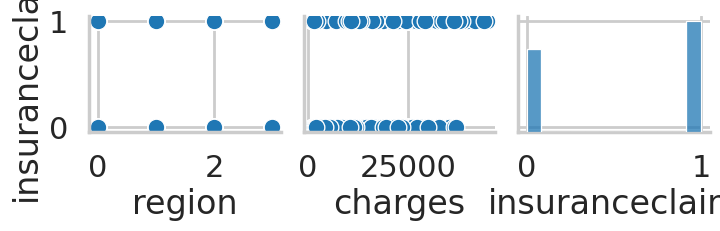

In [ ]:
for i in range(0, len(df.columns), 3):
  sns.pairplot(data=df, x_vars = df.columns[i:i+5], y_vars = ['insuranceclaim'])

age                  Axes(0.125,0.712609;0.168478x0.167391)
sex               Axes(0.327174,0.712609;0.168478x0.167391)
bmi               Axes(0.529348,0.712609;0.168478x0.167391)
steps             Axes(0.731522,0.712609;0.168478x0.167391)
children             Axes(0.125,0.511739;0.168478x0.167391)
smoker            Axes(0.327174,0.511739;0.168478x0.167391)
region            Axes(0.529348,0.511739;0.168478x0.167391)
charges           Axes(0.731522,0.511739;0.168478x0.167391)
insuranceclaim        Axes(0.125,0.31087;0.168478x0.167391)
dtype: object

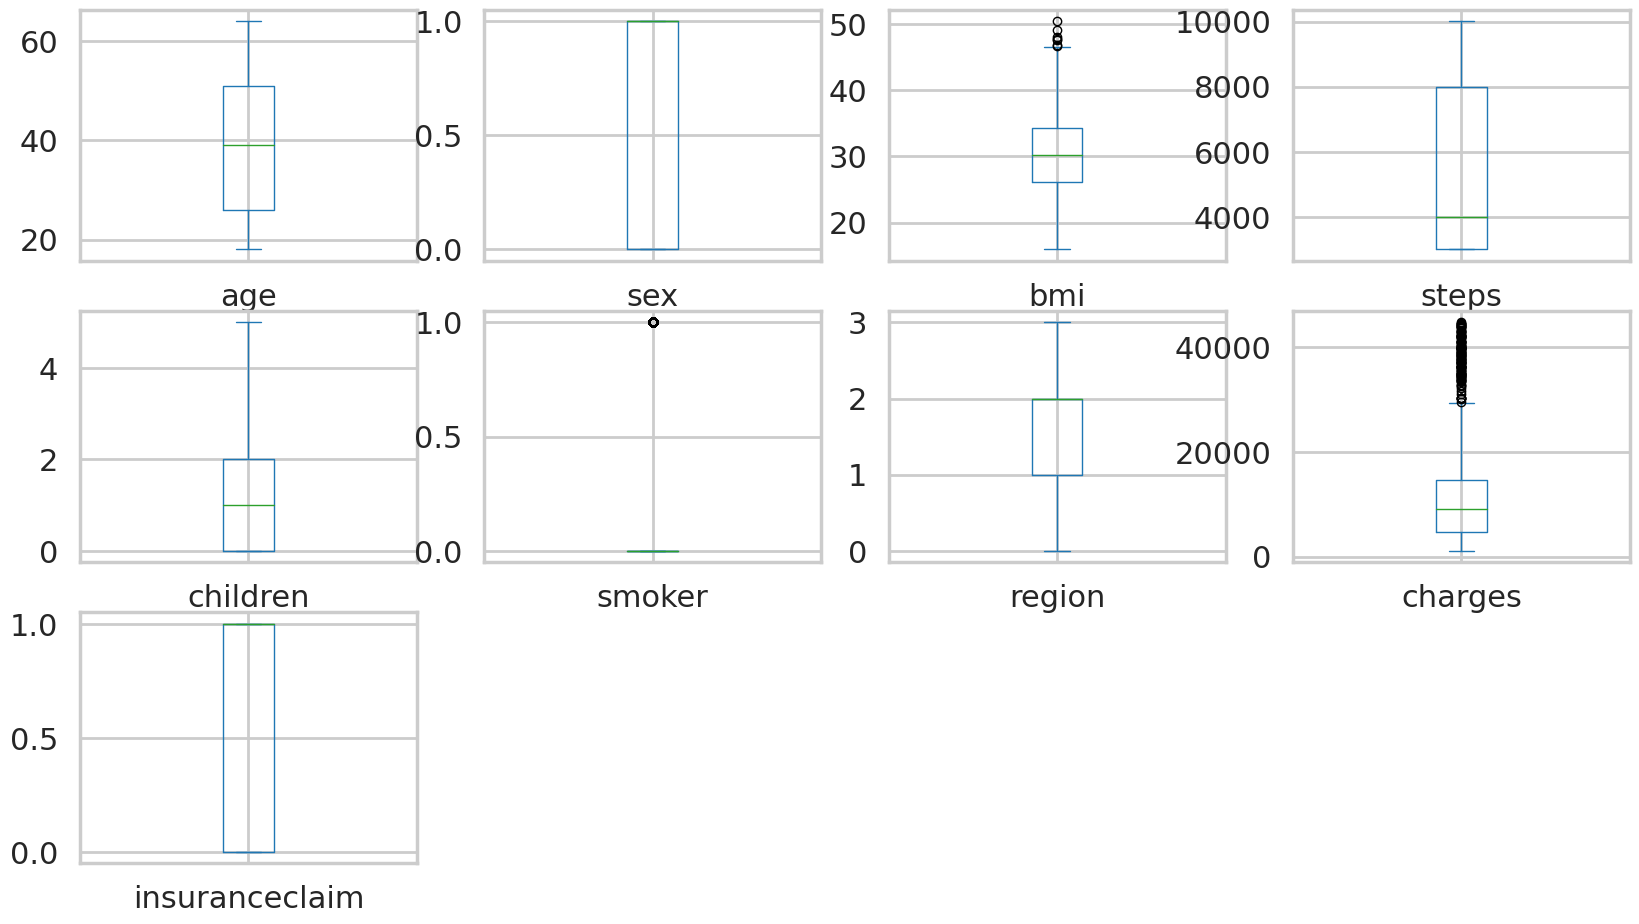

In [ ]:
df.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(
20,15))


Pada variabel smoker outlier terhapus karena telah difilter.

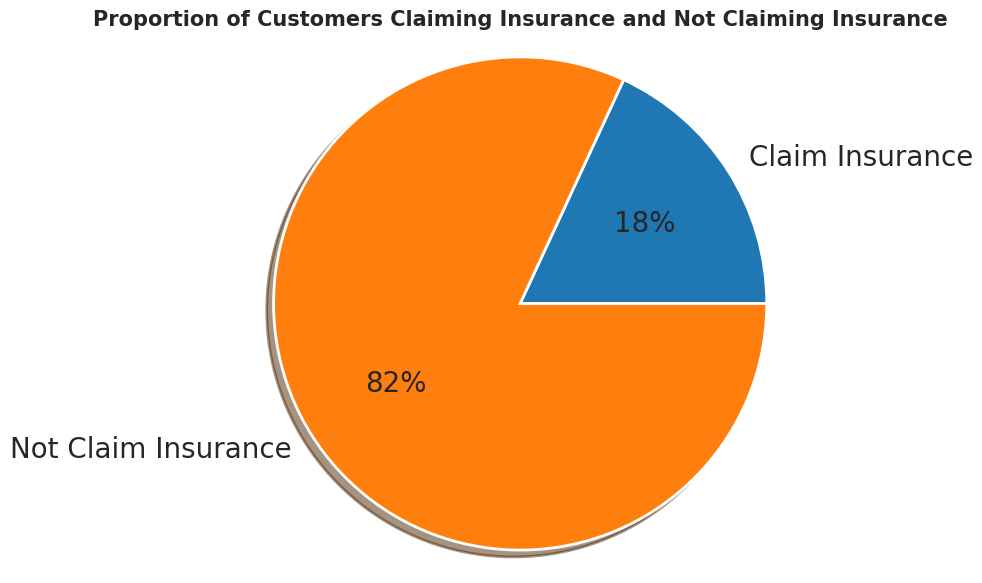

In [ ]:
labels = 'Claim Insurance', "Not Claim Insurance"
sizes = [df.smoker[df['smoker'] == 1].count(), df.smoker[df['smoker'] == 0].count()]

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, labels=labels, autopct='%.0f%%', shadow=True, textprops={'fontsize': 20})
ax1.axis('equal')
plt.title("Proportion of Customers Claiming Insurance and Not Claiming Insurance",
        fontsize = 15,
        family = 'sans-serif',
        fontweight='bold')
plt.show()

### Data Distribution

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

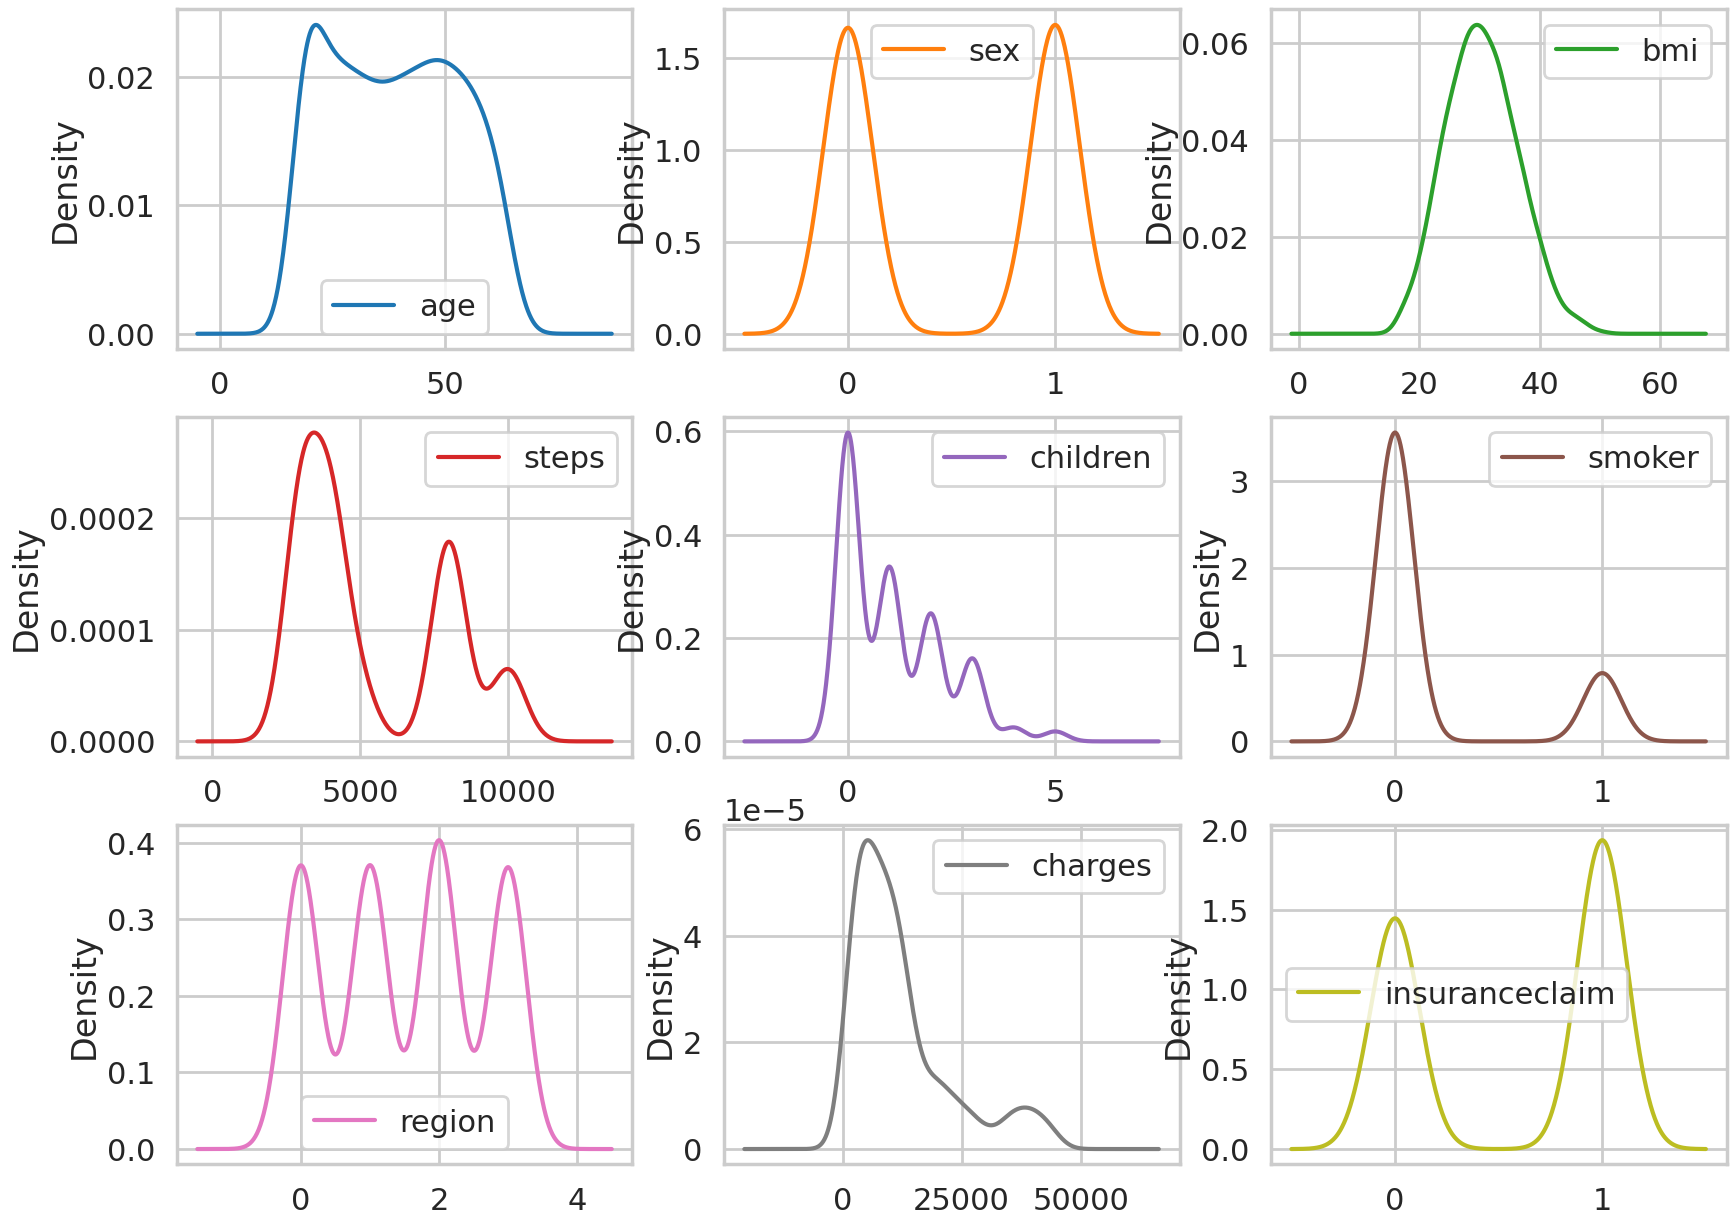

In [ ]:
#data distribution
df.plot(kind='density', subplots = True, layout =(3,3), figsize = (20,15), sharex = False )

Data Distribution digunakan sebagai visualisasi data pada setiap variabel. Tujuannya untuk lebih memahami data tersebut dan bisa memberikan insight tentang karakteristik data tersebut. selain itu juga bisa mengidentifikasi apakah data tersebut berdistribusi normal atau tidak.

variabel non categorical seperti bmi, age, dan steps.

### Check Balanced Data


In [ ]:
#untuk melihat data seimbang atau tidak
df['smoker'].value_counts()


0    1063
1     235
Name: smoker, dtype: int64

Pada Variabel smoker terjadinya inbalanced karena lebih banyak yang tidak merokok dibanding yang merokok. perbedannya kurang lebih 5x lipat

In [ ]:
#untuk melihat data seimbang atau tidak
df['insuranceclaim'].value_counts()


1    743
0    555
Name: insuranceclaim, dtype: int64

Pada variabel ini dapat dikatakan balanced karena tidak melebihi 2x lipat.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1298 non-null   int64  
 1   sex             1298 non-null   int64  
 2   bmi             1298 non-null   float64
 3   steps           1298 non-null   int64  
 4   children        1298 non-null   int64  
 5   smoker          1298 non-null   int64  
 6   region          1298 non-null   int64  
 7   charges         1298 non-null   float64
 8   insuranceclaim  1298 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 101.4 KB


**B. [LO 3, LO 4, 5 poin] Lakukan eksplorasi data terlebih dahulu untuk memahami permasalahan
yang dihadapi terlebih dahulu. Selanjutnya pisahkan dataset menjadi train, test dan validation
set dengan ketentuan (80 train, 10 val, 10 test)**


### EDA

In [ ]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [ ]:
df.tail()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,4008,3,0,1,10600.5483,0
1334,18,0,31.92,3003,0,0,0,2205.9808,1
1335,18,0,36.85,3008,0,0,2,1629.8335,1
1336,21,0,25.80,8009,0,0,3,2007.9450,0
1337,61,0,29.07,8008,0,1,1,29141.3603,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1298 non-null   int64  
 1   sex             1298 non-null   int64  
 2   bmi             1298 non-null   float64
 3   steps           1298 non-null   int64  
 4   children        1298 non-null   int64  
 5   smoker          1298 non-null   int64  
 6   region          1298 non-null   int64  
 7   charges         1298 non-null   float64
 8   insuranceclaim  1298 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 101.4 KB


In [ ]:
df.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000
mean,38.804314,0.502311,30.427596,5384.056240,1.091680,0.181048,1.508475,12203.639005,0.572419
std,13.912556,0.500187,5.959941,2468.898889,1.207816,0.385206,1.108044,10522.238986,0.494918
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,26.000000,0.000000,26.125000,3009.000000,0.000000,0.000000,1.000000,4662.866675,0.000000
50%,39.000000,1.000000,30.140000,4007.000000,1.000000,0.000000,2.000000,9076.899275,1.000000
75%,51.000000,1.000000,34.320000,8004.000000,2.000000,0.000000,2.000000,14548.500637,1.000000
max,64.000000,1.000000,50.380000,10010.000000,5.000000,1.000000,3.000000,44641.197400,1.000000


In [ ]:
df.shape

(1298, 9)

Colomnnya tetap 9, tidak melakukan drop colomn.


In [ ]:
df.isnull().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

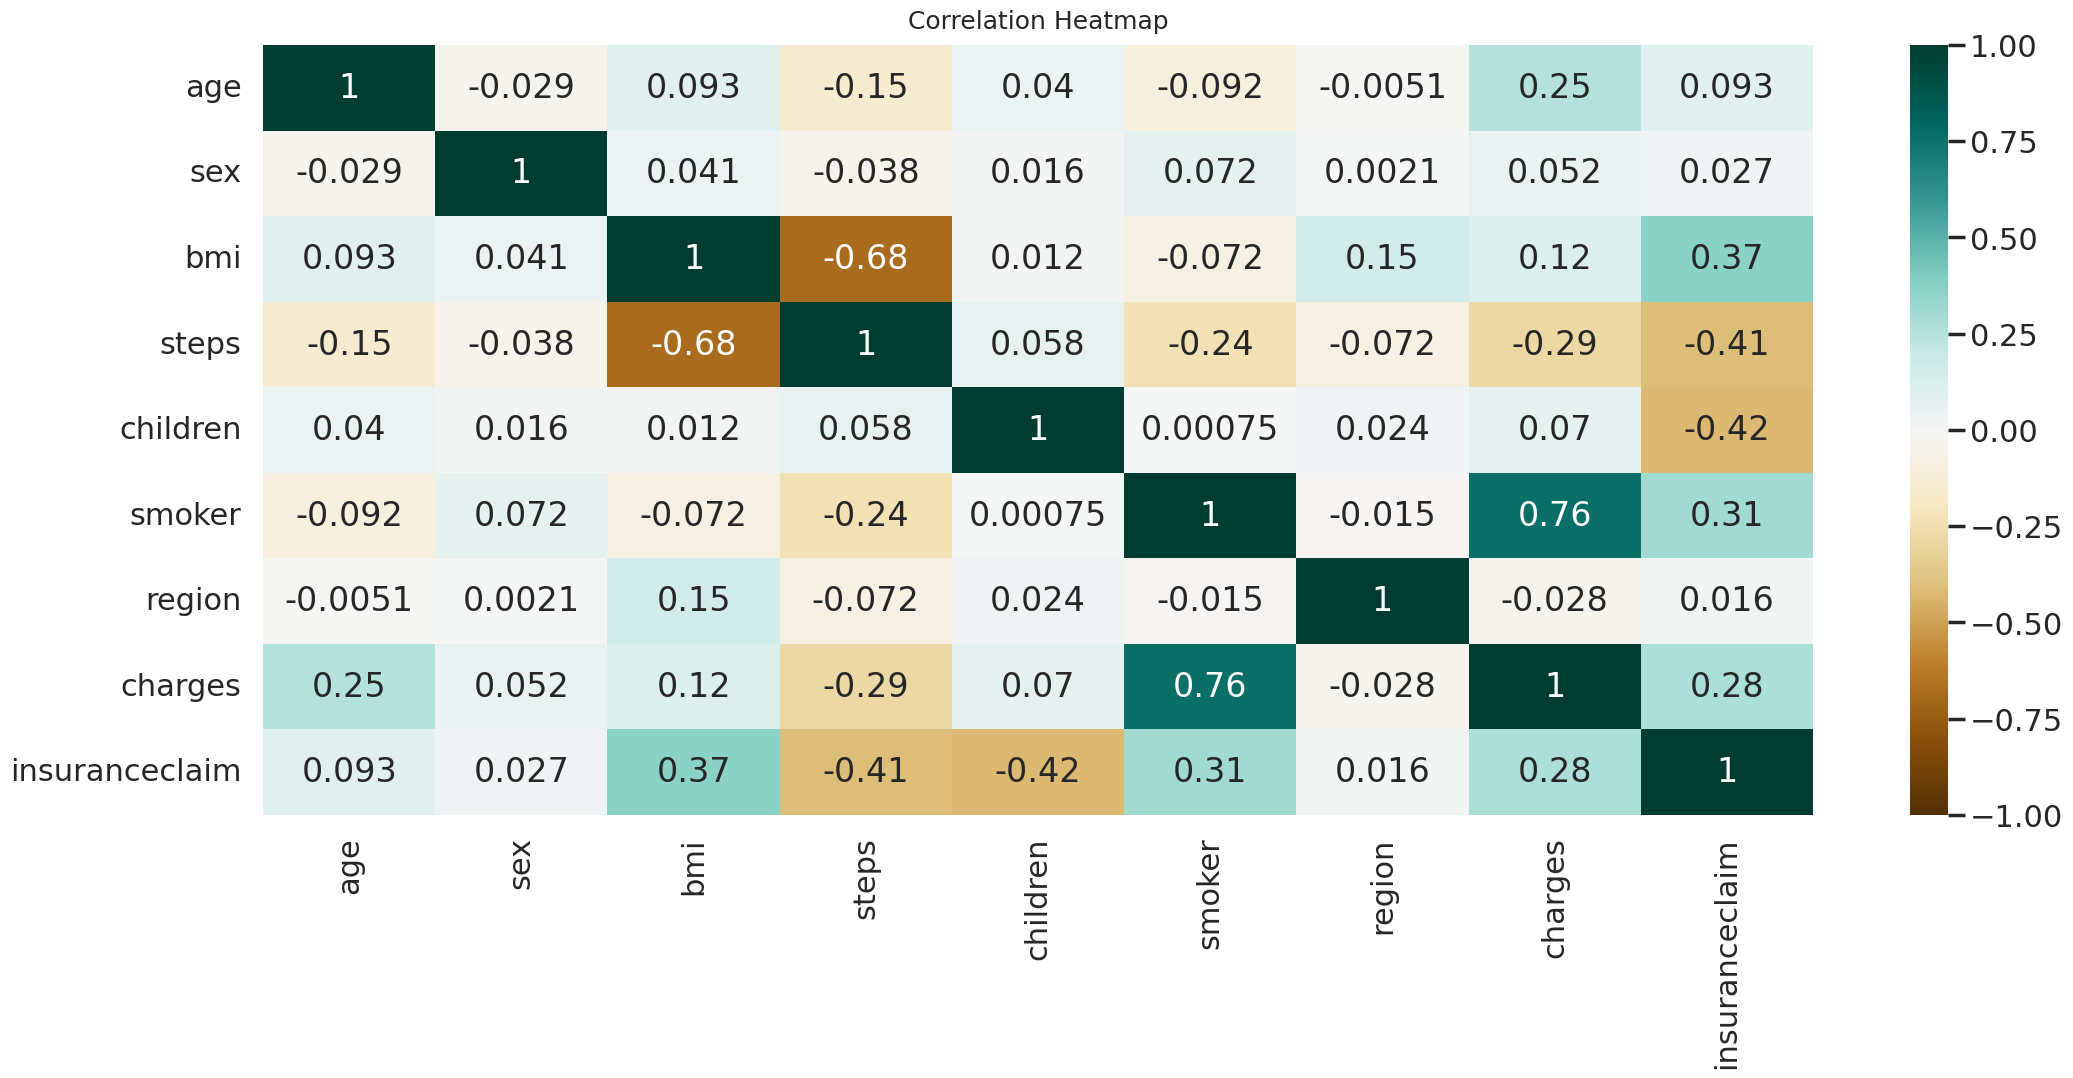

In [ ]:
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax=1, annot= True, cmap ='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad=12);

Pada Data tersebut dapat dilihat bahwa variabel smoker dan charges memiliki korelasi yang paling tinggi dan variabel terendah ada pada variabel steps dan bmi.


--> Selanjutnya pisahkan dataset menjadi train, test dan validation
set dengan ketentuan (80 train, 10 val, 10 test)

In [ ]:

X = df.drop('insuranceclaim', axis=1).values
y = df.insuranceclaim.values

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(np.expand_dims(y,axis=1))

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = 24)
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.2, random_state = 24)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('insuranceclaim', axis=1), df['insuranceclaim'], test_size=0.1, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.1, random_state=24)

In [ ]:
print ('Train      :', X_train.shape, y_train.shape)
print ('Test       :', X_test.shape, y_test.shape)
print ('Validation :', X_val.shape, y_val.shape)

Train      : (1051, 8) (1051,)
Test       : (130, 8) (130,)
Validation : (117, 8) (117,)


**C. [LO 3, LO 4, 5 poin] Buatlah arsitektur baseline dengan n nodes input layer, 2 buah hidden
layer dengan banyak 2 × n nodes awal dan layer akhir banyak kelas nya (n, 2 × n, 2 × n,
num_class). Keterangan: n adalah banyak input dan num_class adalah banyak kelas. Activation
function untuk tiap hidden layer menggunakan ReLU**

## Import Library

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras import optimizers

## Modelling

In [ ]:
n = 8
num_class = 2

#model
model = Sequential([
    #input
    layers.Dense(n, activation='relu'),

    #hidden
    layers.Dense(2*n, activation='relu'),
    layers.Dense(2*n, activation='relu'),

    #output
    layers.Dense(num_class)
])

In [ ]:
model.compile(loss="mean_squared_error")

In [ ]:
# Now let's train the model
history = model.fit(epochs=100, x=train_X, y= train_y,
          validation_data=(valid_X, valid_y), verbose=1)

Epoch 1/100
26/26 [==============================] - 1s 9ms/step - loss: 0.9494 - val_loss: 0.9006
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.8654 - val_loss: 0.8616
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.8118 - val_loss: 0.8192
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.7619 - val_loss: 0.7665
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.7199 - val_loss: 0.7373
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6868 - val_loss: 0.7034
Epoch 7/100
26/26 [==============================] - 0s 7ms/step - loss: 0.6658 - val_loss: 0.6865
Epoch 8/100
26/26 [==============================] - 0s 7ms/step - loss: 0.6468 - val_loss: 0.6647
Epoch 9/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6319 - val_loss: 0.6517
Epoch 10/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6134 - val_loss: 0.6263
Epoch 11/

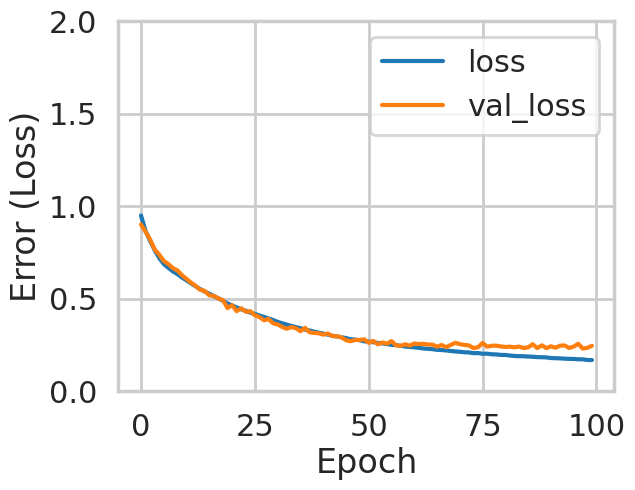

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,2])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)
plot_loss(history)

**D. [LO 3, LO 4, 15 poin] Setelah mengetahui hasil dari nomor (1c), modifikasi arsitektur pada
nomor 1c untuk mendapatkan nilai akurasi optimal yang kalian dapatkan (kalian dapat
menambahkan atau mengurangi arsitektur tersebut, atau mengganti hyperparameter, atau
menggunakan tuning pada hyperparameter). Jelaskan alasan kalian untuk menggunakan
pendekatan yang kalian pilih.**

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

n= 8
num_class = 1

newmodel3 = Sequential([
    layers.Dense(n, activation='relu'), #input


    layers.Dense(2*n, activation='relu'), #hidden
    Dropout(0.2),
    layers.Dense(2*n, activation='relu'),
    Dropout(0.2),

    layers.Dense(num_class, activation='sigmoid') #output
])

newmodel3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = newmodel3.fit(epochs=100, x=X_train, y=y_train, validation_data=(X_val, y_val), verbose=1) #nunjukin outputnya mau diliatin ga)

Epoch 1/100
33/33 [==============================] - 3s 10ms/step - loss: 0.7553 - accuracy: 0.4263 - val_loss: 0.7028 - val_accuracy: 0.5214
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 0.7027 - accuracy: 0.5500 - val_loss: 0.6652 - val_accuracy: 0.6325
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6670 - accuracy: 0.6156 - val_loss: 0.6299 - val_accuracy: 0.6838
Epoch 4/100
33/33 [==============================] - 0s 5ms/step - loss: 0.6377 - accuracy: 0.6632 - val_loss: 0.5928 - val_accuracy: 0.7094
Epoch 5/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6151 - accuracy: 0.6813 - val_loss: 0.5549 - val_accuracy: 0.7350
Epoch 6/100
33/33 [==============================] - 0s 4ms/step - loss: 0.5866 - accuracy: 0.7031 - val_loss: 0.5191 - val_accuracy: 0.7521
Epoch 7/100
33/33 [==============================] - 0s 4ms/step - loss: 0.5486 - accuracy: 0.7431 - val_loss: 0.4828 - val_accuracy: 0.7692
Epoch 8/100


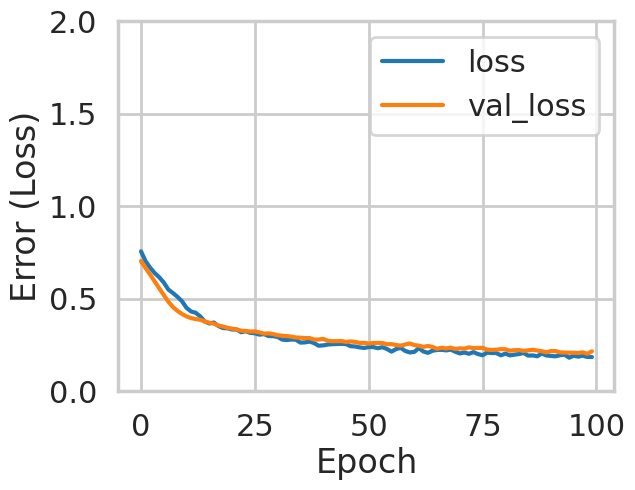

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,2])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [ ]:
print('Loss and Accuracy = ',newmodel3.evaluate(X_test, y_test, verbose=0))

Loss and Accuracy =  [0.19932718575000763, 0.9230769276618958]


**Explanasi:**

  Pada Arsitektur baseline, diperoleh hasil evaluasi yang sangat Overfitting, dengan nilai re-call mencapai 99%. Tentunya model overfitting menjadi masalah yang serius dalam jaringan ini.  
Menurut Nowlan and Hinton penyebab dari overfitting adalah karena deep neural networks mengandung beberapa non-linear hidden layes dan membuat sangat rumit antara input dan output.
Namun, karena data training yang terbatas, menyebabkan sampling noise sehingga mereka akan ada didalam set training tetapi tidak dalam tes data, meskipun diambil dari distribusi yang sama.

Cara mengatasi Overfitting sudah banyak metode yang dikembangkan salah satunya yang akan saya pakai untuk mengurangi overfitting adalah dropout.

Dalam teknik Dropout mencegah overfitting dan memberikan cara untuk menggabungkan neural network secara eksponensial dari arsitektur yang berbeda seara efisien.

Dropout adalah untuk meningkatkan jaringan saraf dengan mengurangi overfitting.
Teknik ini juga menemukan untuk meningkatkan kinerja jaring saraf dalam berbagai domain aplikasi termasuk klasifikasi objek, pengenalan angka, pengenalan suara, klasifikasi dokumen dan
analisis data biologi komputasi. Hal ini menunjukkan bahwa dropout adalah teknik umum
dan tidak spesifik untuk domain apa pun.

references:

Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: A simple way to prevent neural networks from overfitting. Journal of Machine Learning Research, 15(1), 1929-1958.



Activation functions ini banyak jenisnya yang paling umum digunakan adalah ReLU (digunakan pada hidden layer). yang saya gunakan dalam tuning model adalah sigmoid karena cocok untuk Binary Classification, sesuai soal no 1.

references:


Glorot, X., Bordes, A., & Bengio, Y. (2011). Deep sparse rectifier neural networks. In Proceedings of the 14th International Conference on Artificial Intelligence and Statistics (pp. 315-323).



**E. Evaluasi [LO 3, LO 4, 5 poin] Lakukan evaluasi unjuk kerja kedua arsitektur di atas pada test set dengan
mencari nilai accuracy, precision, recall dan F1-Score. Dan berikan penjelasan mengenai
hasilnya dengan rinci.**

### Evaluasi Benchmark

In [ ]:
#benchmark
Evaluate = model.predict(X_test)
Evaluate = np.round(np.max(Evaluate, axis=1))
print(classification_report(y_test, Evaluate))

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.95      0.99      0.97        78

    accuracy                           0.96       130
   macro avg       0.97      0.96      0.96       130
weighted avg       0.96      0.96      0.96       130



### Modifikasi arsitektur

In [ ]:
Evaluate = newmodel3.predict(X_test)
Evaluate = np.round(np.max(Evaluate, axis=1))
print(classification_report(y_test, Evaluate))

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        52
           1       0.96      0.91      0.93        78

    accuracy                           0.92       130
   macro avg       0.92      0.93      0.92       130
weighted avg       0.93      0.92      0.92       130



**Evaluate hasil :**

Pada kedua arsitektur diatas, terdapat benchmark dan model yang telah dituning.
Benchmark mendapatkan hasil evaluasi yang sangat Overfitting, dengan nilai re-call mencapai 99%. f1-score tertinggi mencapai 97%, untuk akurasi sebesar 96% dari data testing sebesar 130 data. Jika dilihat secara keseluruhan hasil evaluasi yang didapat 96%. Tentunya model overfitting menjadi masalah yang serius dalam jaringan ini.  

Benchmark ini harus melakukan tuning agar tidak overfitting.

Hasil dari model yang telah dituning kini tidak lagi overfitting. hasil akurasi yang didapat dari hasil tuning hyperparameter adalah menjadi 92 persen, f1-score menjadi 91 persen. mengalami penurunan dibanding sebelum menggunakan tuning hyperparameter.



Explain:

 Pada Arsitektur baseline, diperoleh hasil evaluasi yang sangat Overfitting, dengan nilai re-call mencapai 99%. Tentunya model overfitting menjadi masalah yang serius dalam jaringan ini.  
Menurut Nowlan and Hinton penyebab dari overfitting adalah karena deep neural networks mengandung beberapa non-linear hidden layes dan membuat sangat rumit antara input dan output.
Namun, karena data training yang terbatas, menyebabkan sampling noise sehingga mereka akan ada didalam set training tetapi tidak dalam tes data, meskipun diambil dari distribusi yang sama.

Loss antara model bennchmark dengan model yang telah ditunning, mengalami perbedaan yang jauh. setelah menemukan tunning loss berkurang dengan pesat. pada model benchmark didapat lossnya sebesar 0.5183 sedangkan pada model tuning hyperparameter didapat 0,199. yang artinya penurunan loss sudah signifikan.

Dalam Ai ada kesenjangan antara computational neuroscience models
and machine learning neural network models yang dapat dihubungkan menggunakan activation functions. Activation functions ini banyak jenisnya yang paling umum digunakan adalah ReLU (digunakan pada hidden layer). yang saya gunakan dalam tuning model adalah sigmoid karena cocok untuk Binary Classification, sesuai soal no 1.


References:
1. Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: A simple way to prevent neural networks from overfitting. Journal of Machine Learning Research, 15(1), 1929-1958.
2. https://github.com/keras-team/keras/blob/v2.12.0/keras/layers/core/dense.py#L33-L301
3. Glorot, X., Bordes, A., & Bengio, Y. (2011). Deep sparse rectifier neural networks. In Proceedings of the 14th International Conference on Artificial Intelligence and Statistics (pp. 315-323).
4. https://github.com/keras-team/keras/issues/6977
5. https://medium.com/@samuelsena/pengenalan-deep-learning-8fbb7d8028ac

